In [22]:
from tensorflow.keras.datasets.cifar10 import load_data

In [23]:
(x_train, y_train), (x_test, y_test) = load_data()

In [24]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [25]:
import matplotlib.pyplot as plt

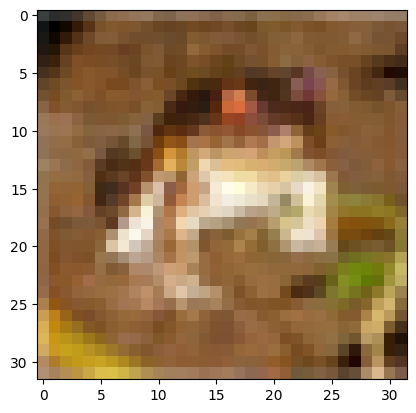

In [26]:
plt.imshow(x_train[0])

In [27]:
y_train[0]

array([6], dtype=uint8)

0 : airplane

1 : automobile

2 : bird

3 : cat

4 : deer

5 : dog

6 : frog

7 : horse

8 : ship

9 : truck

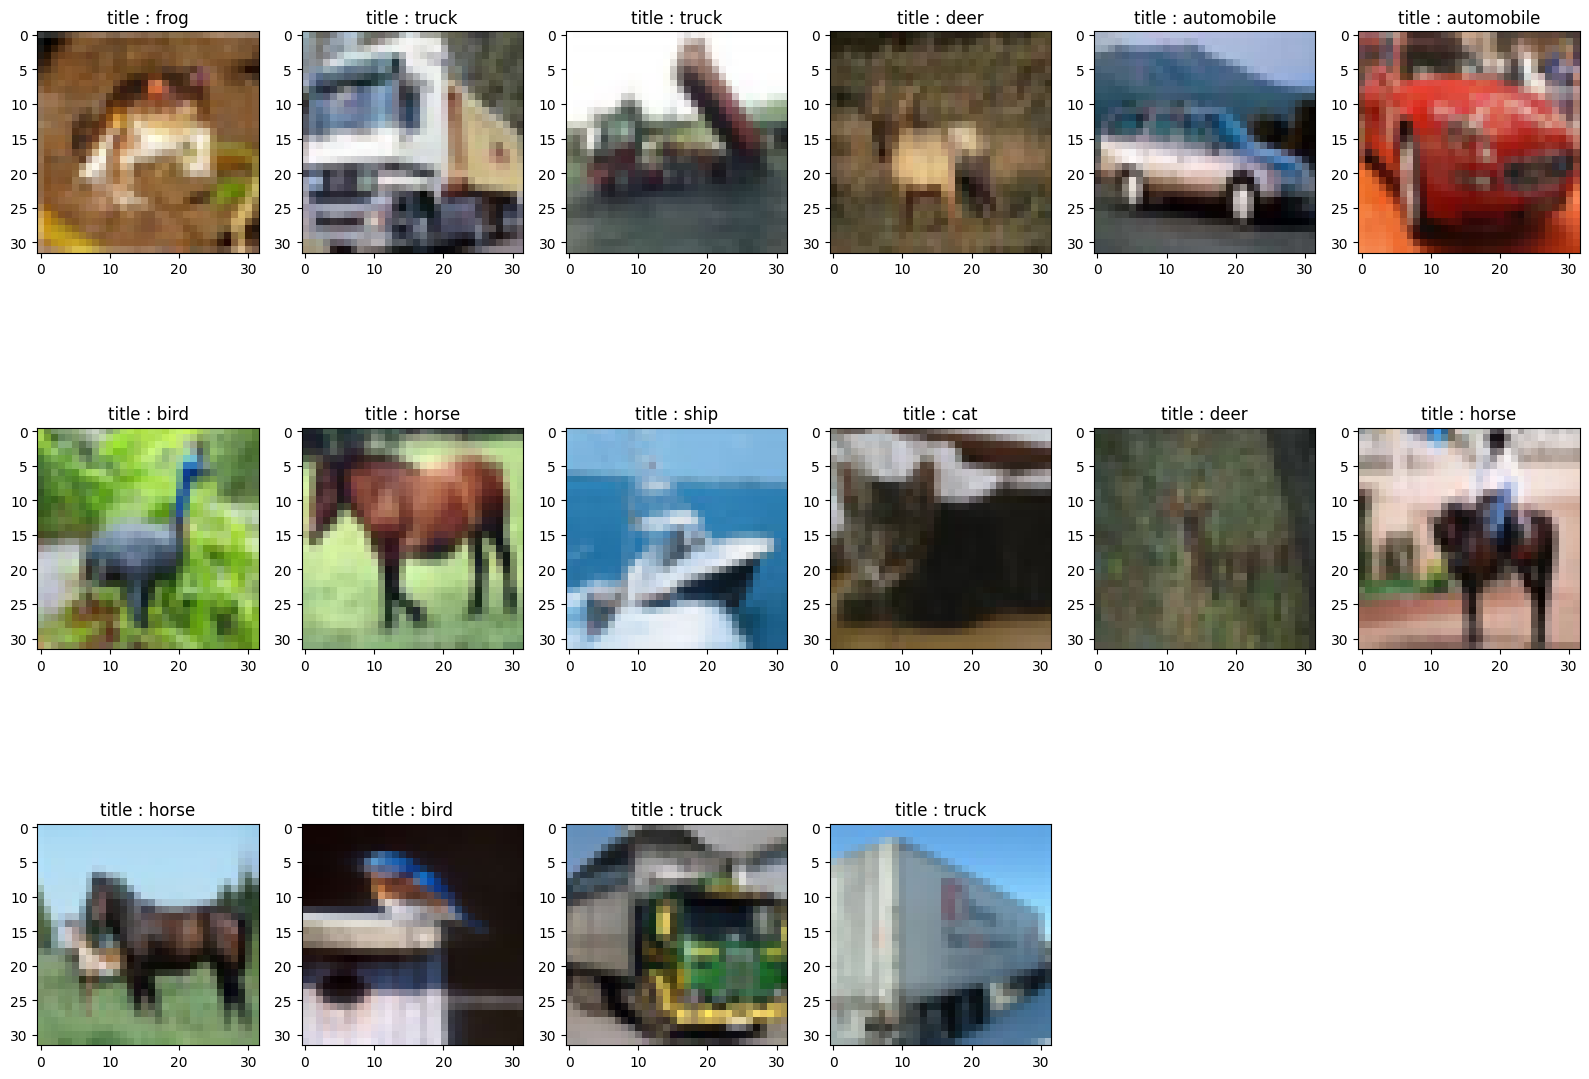

In [28]:
cifar10_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(16, 16))

for idx, sample in enumerate(x_train[:16]):
    plt.subplot(4, 6, idx+1)
    plt.imshow(sample)
    plt.title(f"title : {cifar10_names[y_train[idx][0]]}")

plt.tight_layout()
plt.show()

In [29]:
# CNN을 이용하여 학습하고 모델 평가 해보자.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from time import time
import numpy as np
import matplotlib.pyplot as plt
import random

In [30]:
x_train_scale, x_test_scale = x_train / 255.0, x_test / 255.0

In [31]:
print(x_train_scale.shape, y_train.shape)
print(x_test_scale.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [32]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense 

In [33]:
inputs = Input(shape=(32, 32, 3))

x = Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(128, activation="relu")(x)
outputs = Dense(10, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)

In [34]:
# 컴파일
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])

In [35]:
start_time = time()

result = model.fit(x_train_scale, y_train, epochs=10, batch_size=100, validation_split=0.3)
print(f"fit time : {time() - start_time}")

Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - acc: 0.2974 - loss: 1.9176 - val_acc: 0.4925 - val_loss: 1.4120
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - acc: 0.5064 - loss: 1.3735 - val_acc: 0.5527 - val_loss: 1.2561
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - acc: 0.5666 - loss: 1.2081 - val_acc: 0.5901 - val_loss: 1.1524
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - acc: 0.6217 - loss: 1.0789 - val_acc: 0.6361 - val_loss: 1.0435
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - acc: 0.6565 - loss: 0.9812 - val_acc: 0.6295 - val_loss: 1.0586
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - acc: 0.6794 - loss: 0.9207 - val_acc: 0.6669 - val_loss: 0.9668
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - acc: 0.6951 - loss: 0.8632 - val_acc: 0.6764 - val_loss: 0.9411
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - acc: 0.7200 - loss: 0.8053 - val_acc: 0.6894 - val_loss: 0.8999
Epoch 9/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms

In [36]:
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,040 (1011.88 KB)

 Trainable params: 86,346 (337.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 172,694 (674.59 KB)

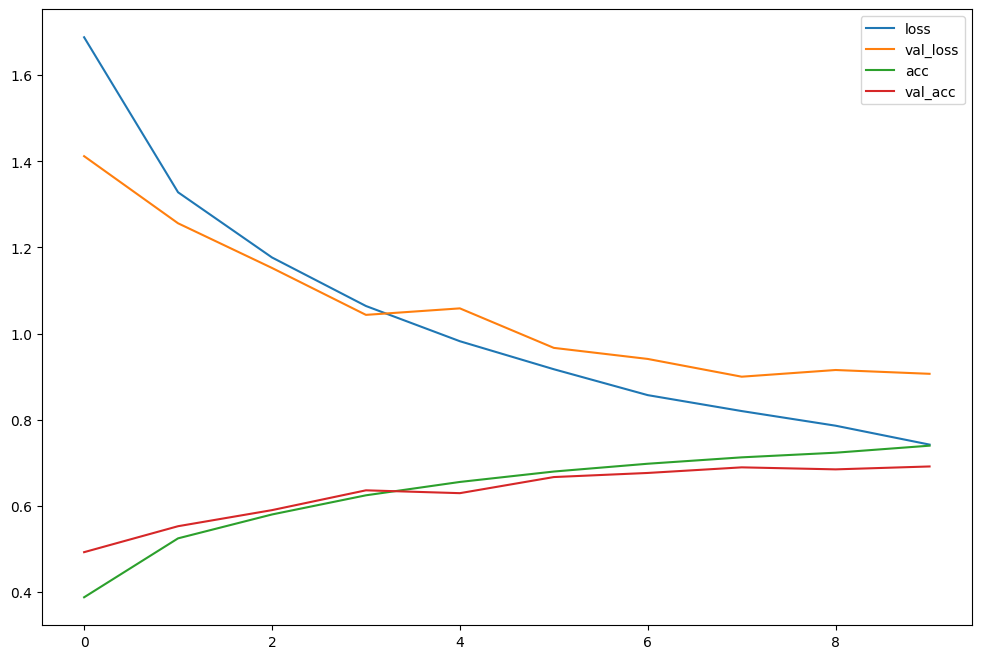

In [37]:
plot_target = ["loss", "val_loss", "acc", "val_acc"]

plt.figure(figsize=(12, 8))

for target in plot_target:
    plt.plot(result.history[target], label=target)

plt.legend()
plt.show()

In [38]:
model.evaluate(x_test_scale, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.6953 - loss: 0.8839


[0.8992406129837036, 0.6868000030517578]

In [40]:
prodict = model.predict(x_test_scale)
predict_label = np.argmax(prodict, axis=1)

print(y_test)
print(predict_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
[3 8 8 ... 5 1 7]


In [41]:
wrong_predict = list()

for i in range(len(y_test)):
    if predict_label[i] !=y_test[i]:
        wrong_predict.append(i)

print(len(wrong_predict))

3132


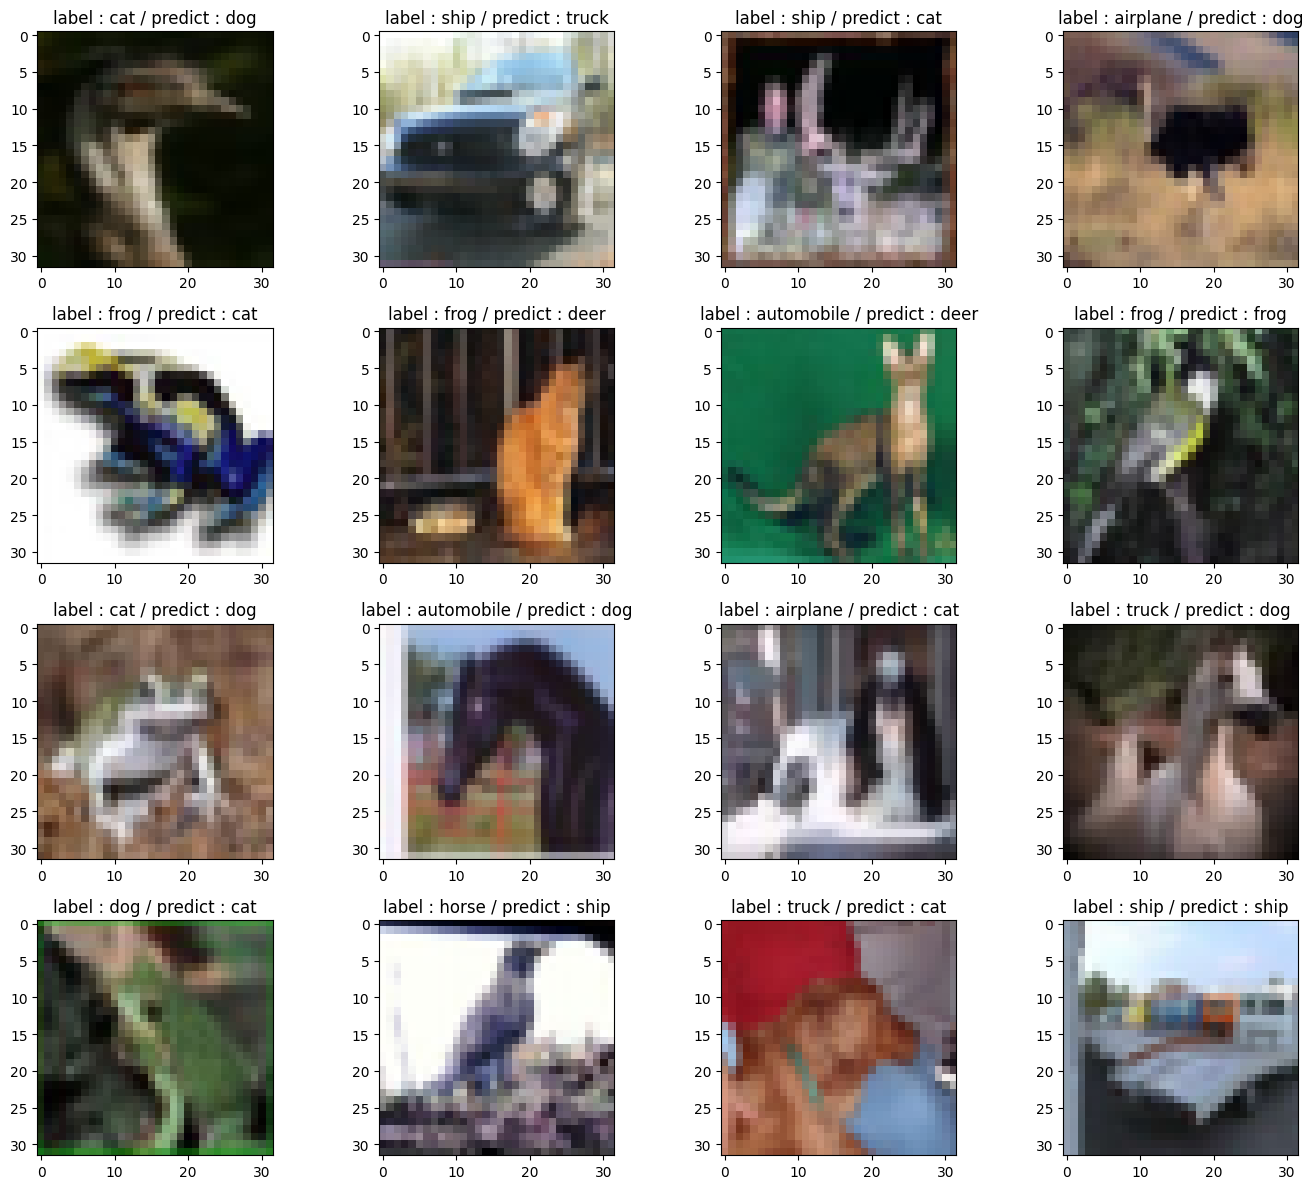

In [42]:
samples = random.choices (population=wrong_predict, k=16)

plt.figure(figsize=(14, 12))

for idx, sample in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[sample].reshape(32, 32, 3), cmap="Greys")
    plt.title(f"label : {cifar10_names[y_test[idx][0]]} / predict : {cifar10_names[predict_label[sample]]}")

plt.tight_layout()
plt.show()